# Symbolic Mathematics (`sympy`)

In [1]:
import sympy as sp
import sympy.plotting as spl

import numpy as np

In [2]:
sp.init_printing()

### `sympy` treats stuff fundamentally different than `numpy`

In [3]:
np.sqrt(8)

In [4]:
type(np.sqrt(8))

numpy.float64

In [5]:
sp.sqrt(8)

In [6]:
type(sp.sqrt(8))

sympy.core.mul.Mul

In [7]:
np.sqrt(8) == sp.sqrt(8)

False

In [8]:
np.pi

In [9]:
np.pi + 4

In [10]:
sp.pi

In [11]:
sp.pi + 4

#### You can use `np.float64()` to turn a `sympy` float to a `numpy` float

In [12]:
np.float64(sp.pi)

In [13]:
np.float64(sp.pi) + 4

## `sympy` has its own way to handle rational numbers

In [14]:
sp.Rational(3,5)

In [15]:
sp.Rational(3,5) + sp.Rational(1,3)

### Adding `.n()` to the end of a sympy expression will `evaluate` expression

In [16]:
sp.Rational(3,5).n()

In [17]:
sp.pi.n()

### You can add a value to `.n(value)` to set the number of significant figures

In [18]:
sp.Rational(222,7).n()

In [19]:
sp.Rational(222,7).n(1)

In [20]:
sp.Rational(222,7).n(3)

### `nsimplify()` will sort-of do the reverse of `.n()`

- This is a bit like a `numpy` to a `sympy` conversion.

In [21]:
sp.nsimplify(0.6)

In [22]:
sp.nsimplify(4.242640687119286)

In [23]:
sp.nsimplify(sp.pi, tolerance = 1e-2)

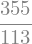

In [24]:
sp.nsimplify(sp.pi, tolerance = 1e-5)

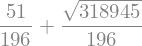

In [25]:
sp.nsimplify(sp.pi, tolerance = 1e-6)

## ... to $\infty$ and beyond

In [26]:
sp.oo

In [27]:
sp.oo + 3

In [28]:
sp.oo / 2

In [29]:
1e199 < sp.oo

---
# Symbolic

### You have to explicitly tell `SymPy` what symbols you want to use.

* Once you declare symbols to use in `sympy` they are unavaliable for other packages

In [30]:
x, y = sp.symbols('x y')
a, b, c = sp.symbols('a b c')

### Expressions are then able use these symbols

$$ \large
F(x, y) = a x^{2} y + b x y + c x y^{2}
$$

In [31]:
my_equation = (a * x**2 * y)  + (b * x * y) + (c * x * y**2)

my_equation

In [32]:
my_equation + 3

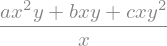

In [33]:
my_equation / x

### `sp.simplify()` attempts to arrive at the simplest form of an expression

In [34]:
sp.simplify(my_equation / x)

### `sp.collect()` attempts to collect like terms of an expression

In [35]:
sp.collect(my_equation, x)

In [36]:
sp.collect(my_equation, y)

### You can evaluate equations for specific values - `.subs()`

- #### Send the values as a dictionary

In [37]:
my_equation

$$ \large
F(x, y);\ y = \frac{1}{2},\ a = 4,\ b = 2,\ c = 8
$$

In [38]:
my_equation.subs(
    {y : sp.Rational(1,2), 
     a : 4,
     b : 2,
     c : 8}
)

### You can also evaluate equations sybolically

$$ \large
F(x, y);\ y = 2x + 3
$$

In [39]:
my_equation

In [40]:
my_y = (2*x + 3)

my_y

#### Replace $y$ with $2x + 3$ using `.subs()`

In [41]:
my_equation.subs( {y: my_y} )

#### Multiply everything through using `.expand()`

In [42]:
sp.expand(my_equation.subs( {y: my_y} ))

#### Collect the terms of $x$ using `.collect()`

In [43]:
sp.collect(sp.expand(my_equation.subs( {y: my_y} )), x)

#### Evaluate the expression for some values of $a, b, c$ using `.subs()`

In [44]:
sp.collect(sp.expand(my_equation.subs( {y: my_y} )), x).subs({a:4, b:2, c:8})

---
# Calculus

$$ \large
F(x, y)
$$

In [45]:
my_equation

$$ \large
\frac{\partial}{\partial x}\ F(x, y)
$$

In [46]:
sp.diff(my_equation, x)

$$ \large
\frac{\partial\,^{2}}{\partial x^{2}}\ F(x, y)
$$

In [47]:
sp.diff(my_equation, x, 2)

$$ \large
\frac{\partial}{\partial y}\ F(x, y)
$$

In [121]:
sp.diff(my_equation, y)

$$ \large
\int  F(x, y)\ dx
$$

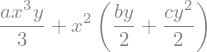

In [49]:
sp.integrate(my_equation, x)

$$ \large
\int  F(x, y)\ dy
$$

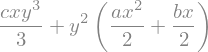

In [50]:
sp.integrate(my_equation, y)

$$ \large
\int_{0}^{5}  F(x, y)\ dx
$$

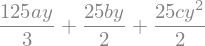

In [51]:
sp.integrate(my_equation, (x, 0, 5))

$$ \large
\int_{0}^{5}  F(x, y)\ dx;\ y = \frac{1}{2},\ a = 4,\ b = 2,\ c = 8
$$

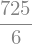

In [52]:
sp.integrate(my_equation, (x, 0, 5)).subs({y : sp.Rational(1,2), a : 4, b :2, c : 8})

In [53]:
sp.integrate(my_equation, (x, 0, 5)).subs({y : sp.Rational(1,2), a : 4, b :2, c : 8}).n()

---
# Solving equations - `solve`

 - ### Sympy's `solve()` function will solve $F()\ =\ 0$
 - ### If you want $F() = \mathrm{Value}$, rewrite function as $F() - \mathrm{Value}\,=\,0$

In [54]:
my_equation

### Values of $x$ that solve $F(x, y) = 0$

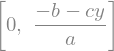

In [55]:
sp.solve(my_equation, x)

### Check the non-trivial solution

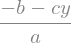

In [56]:
my_x = sp.solve(my_equation, x)[1]

my_x

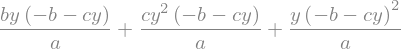

In [57]:
my_equation.subs( {x: my_x} )

In [58]:
sp.expand( my_equation.subs( {x: my_x} ) )

### Values of $y$ that solve $F(x, y) = 0$

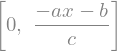

In [59]:
sp.solve(my_equation, y)

#### Values of $y$ that solve $F(x, y) = 2$

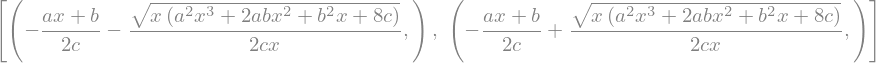

In [60]:
sp.solve([my_equation - 2], y)

---
## There is an alternative way to write equations in `sympy`.

- ### If you have an equation of the form: $F(x,y) = a$
- ### You can use: `sp.Eq(F(x,y), a)`

---
# System of equations

$$ \large
\begin{array}{c}
9x - 2y = 5\\
-2x + 6y = 10\\
\end{array}
$$

In [61]:
equation_a = sp.Eq(9*x - 2*y, 5)

In [62]:
equation_a

In [63]:
equation_b = sp.Eq(-2*x + 6*y, 10)

In [64]:
equation_b

In [65]:
sp.solve([equation_a, equation_b], [x, y])

---
## Matrix

* There are a couple of different ways to create a Matrix
* `Matrix(rows of lists)`
* `Matrix(shape, list)`

#### `rows of lists` is pretty straightforward

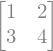

In [66]:
sp.Matrix([[1,2],[3,4]])

#### `shape, list` gives you more flexibility

- Works like numpy's `reshape()`

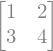

In [67]:
sp.Matrix(2,2,[1,2,3,4])

In [68]:
sp.Matrix(1,4,[1,2,3,4])

In [69]:
sp.Matrix(4,1,[1,2,3,4])

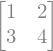

In [70]:
my_matrix = sp.Matrix(2,2,[1,2,3,4])

my_matrix

In [71]:
my_matrix.det()

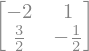

In [72]:
my_matrix ** -1

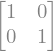

In [73]:
(my_matrix ** -1) * my_matrix

### We can also do it the Linear Algebra (Matrix) way

$$ \large
\begin{bmatrix}
9 & -2 \\
-2 & 6 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
5 \\
10
\end{bmatrix}
$$

$$ \large
A \vec x = b
$$

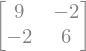

In [74]:
my_A = sp.Matrix(2,2,[9, -2,-2, 6])

my_A

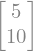

In [75]:
my_b = sp.Matrix(2,1,[5,10])

my_b

$$ \large
\vec x = A^{-1}b
$$

In [76]:
(my_A ** -1) * my_b

---

# Plotting

- You can plot `sympy` function using the `spl.plot()` command.

In [77]:
my_sp_fx = 2 * sp.exp(-x) * sp.cos(5 * x)
my_sp_fx

### Simple plot - `spl.plot( F(X), X-RANGE )`

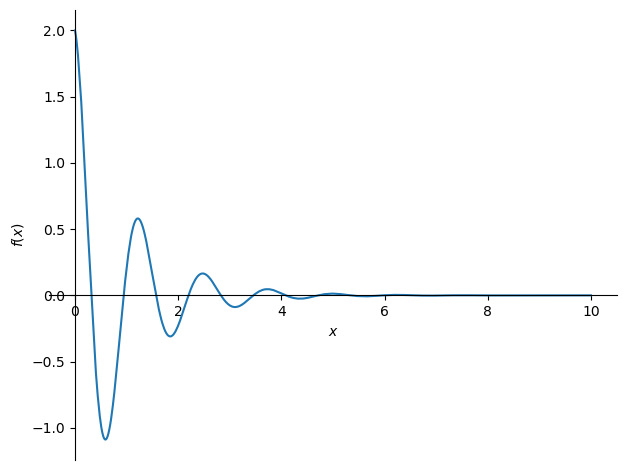

In [78]:
spl.plot(my_sp_fx, (x, 0, 10) );

### You can make the plot look nicer with optional arguments:

- title = 'str'
- xlabel = 'str'
- ylabel = 'str'
- xlim = (xmin, xmax)
- ylim = (ymin, ymax)
- axis_center = (X, Y)
- legend  = True or Flase
- size = (width, height) in inches

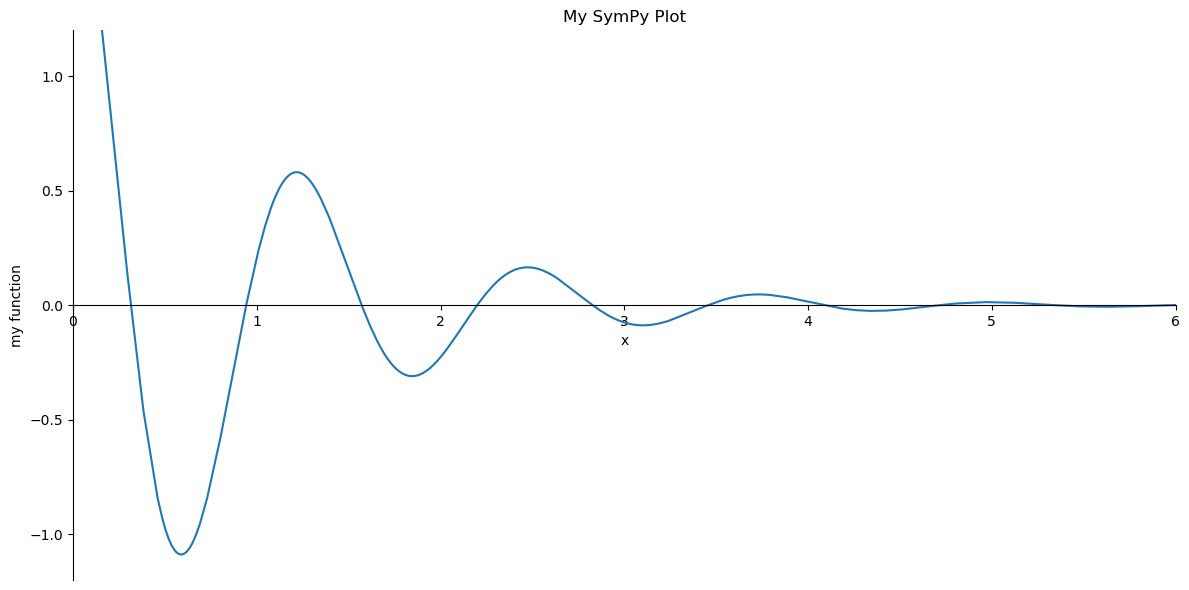

In [79]:
spl.plot(my_sp_fx, 
        (x, 0, 10),
        title = "My SymPy Plot", 
        xlabel = 'x', 
        ylabel = 'my function',
        xlim = (0, 6),
        ylim = (-1.2, 1.2),
        size = (12, 6)
       );

---
## Taylor Series

- Taylor series are polynomial approximations at a specific point
- Use the `sympy` function

In [80]:
my_sp_fx

### Taylor series of f(x) at f(x) = 0

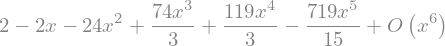

In [81]:
sp.series(my_sp_fx, x, x0 = 0)

### If you want different number of terms

- n = magnitude of the highest term
- n = 4 means all terms up to x$^{4}$ or $\mathcal{O}(4)$, not including $\mathcal{O}(4)$
- Think of it like a slice

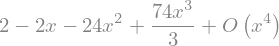

In [82]:
sp.series(my_sp_fx, x, x0 = 0, n = 4)

### Use `.removeO()` to remove the $\mathcal{O}()$ term at the end

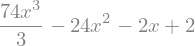

In [83]:
sp.series(my_sp_fx, x, x0 = 0, n = 4).removeO()

## Let do some plotting

- ### Start with a first-order term (a line)

In [84]:
my_1order_fx = sp.series(my_sp_fx, x, x0 = 0, n = 2).removeO()

In [85]:
my_1order_fx

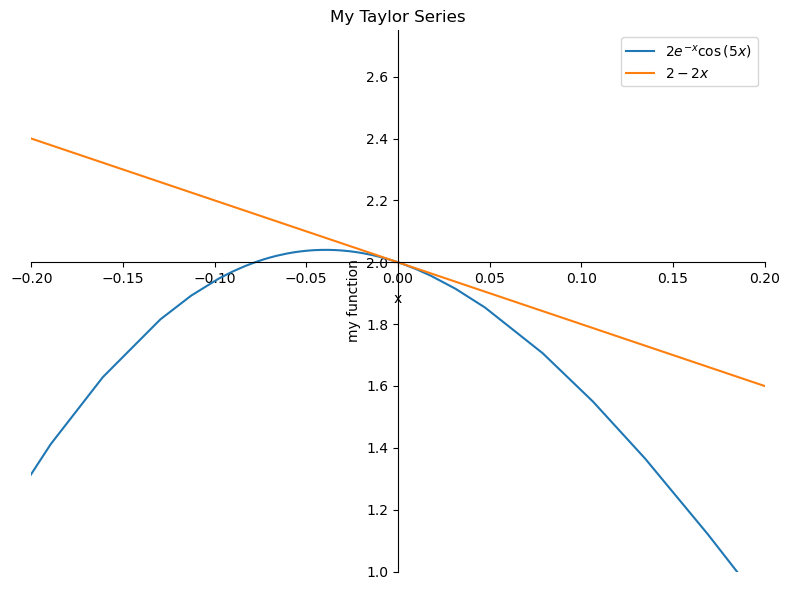

In [86]:
spl.plot(my_sp_fx, my_1order_fx,
        (x, -1.0, 1.0),
        title = "My Taylor Series", 
        xlabel = 'x', 
        ylabel = 'my function',
        xlim = (-0.2, 0.2),
        ylim = (1, 2.75),
        size = (8, 6),
        legend = True,
        axis_center = (0, 2)
       );

In [87]:
my_2order_fx = sp.series(my_sp_fx, x, x0 = 0, n = 3).removeO()
my_3order_fx = sp.series(my_sp_fx, x, x0 = 0, n = 4).removeO()
my_4order_fx = sp.series(my_sp_fx, x, x0 = 0, n = 5).removeO()

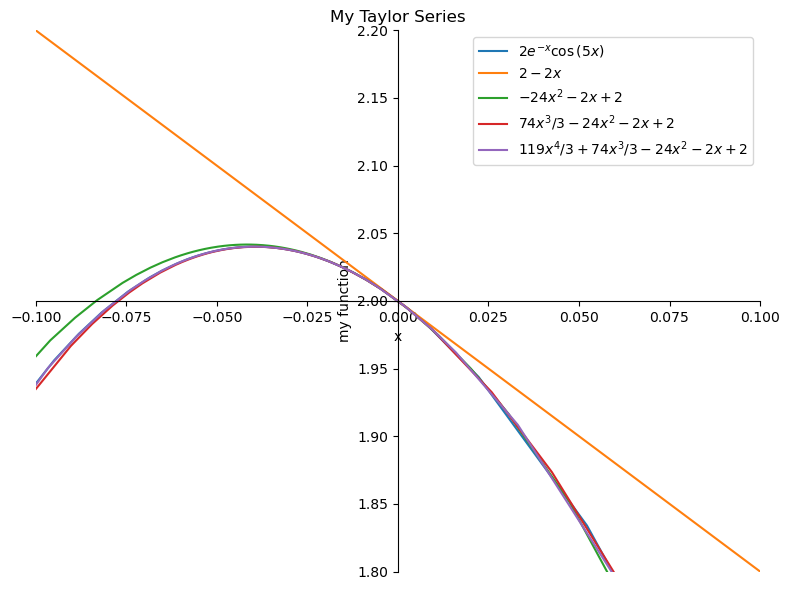

In [88]:
spl.plot(my_sp_fx, my_1order_fx, my_2order_fx, my_3order_fx, my_4order_fx,
        (x, -1.0, 1.0),
        title = "My Taylor Series", 
        xlabel = 'x', 
        ylabel = 'my function',
        xlim = (-0.1, 0.1),
        ylim = (1.8, 2.2),
        size = (8, 6),
        legend = True,
        axis_center = (0, 2)
       );

### The second order fit is just fine since everything is a harmonic oscillator if you look closely enough...

---
## General Equation Solving - `nsolve`

$$
\Large f(x) = 2 \ e^{-x}\,\cos(5x)
$$

$$
\Large g(x) = \frac{3}{2} \left [\frac{x^3}{\pi} - \pi x \right]\\
$$

In [89]:
my_sp_gx = sp.Rational(3,2) * (x ** 3 / sp.pi - sp.pi * x)

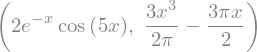

In [90]:
my_sp_fx, my_sp_gx

## Let's plot them up ...

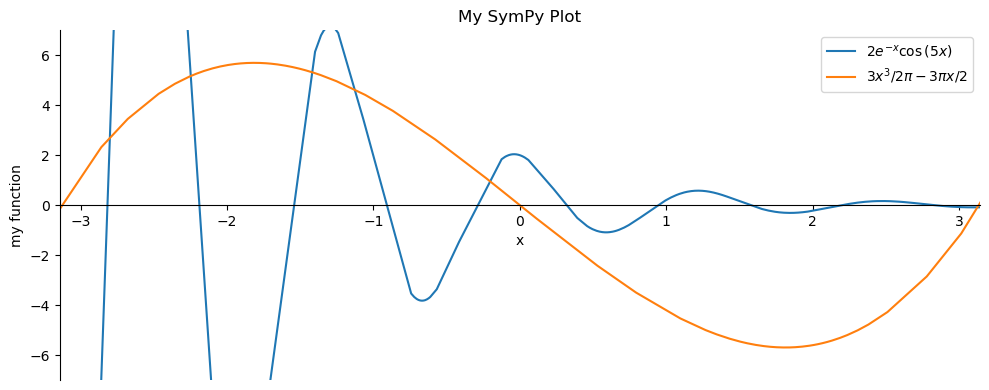

In [91]:
spl.plot(my_sp_fx, my_sp_gx,
        (x, -10, 10),
        title = "My SymPy Plot", 
        xlabel = 'x', 
        ylabel = 'my function',
        xlim = (-sp.pi, sp.pi),
        ylim = (-7, 7),
        size = (10, 4),
        legend = True,
        axis_center = (-sp.pi, 0)
       );

---
## Where do they cross? - The `sympy` solution

### Want to find where `f(x) - g(x) = 0`

### Need to provide an initial guess

In [92]:
my_guess = 3.0

sp.nsolve(my_sp_fx - my_sp_gx, x, my_guess)

In [93]:
all_guesses = (3.0, 0, -1.0)

for val in all_guesses:
    result = sp.nsolve(my_sp_fx - my_sp_gx, x, val)
    print(result)

3.13230565120620
-0.226684315024402
-1.11314326950982


### Your guess has to be (somewhat) close or the solution will not converge:

In [95]:
# my_guess = -40

# sp.nsolve(my_sp_fx - my_sp_gx, x, my_guess)

---

# Some bonus topics

## `sympy` has lots of nice other plotting routines

- [Sympy plotting documentation](https://docs.sympy.org/latest/modules/plotting.html)

## For example - surface plotting with `plot3d`

In [96]:
α, β = sp.symbols('α β')

In [97]:
my_cool_surface = sp.sqrt(α ** 2 + β ** 2) + sp.sin(α ** 2 + β ** 2)

In [98]:
my_cool_surface

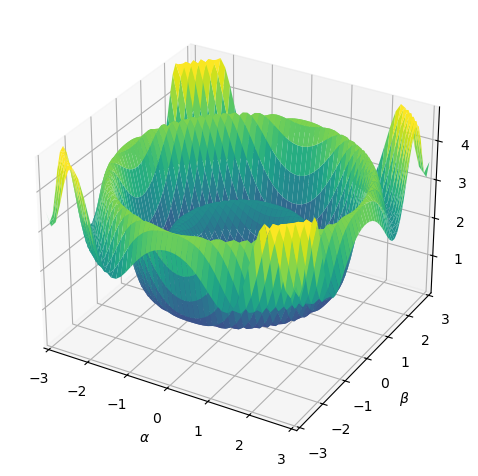

In [99]:
spl.plot3d(my_cool_surface,
           (α, -3, 3),
           (β, -3, 3)
          );

## And parametric plots with `plot_parametric` - Lissajous

<p align="center"> 
<img img style="padding: 0px 10px 0px 0px;" src="https://uwashington-astro300.github.io/A300_images/Lissajous.jpg" width = "500">
<img src="https://uwashington-astro300.github.io/A300_images/YoungMe.jpg" width = "276">
</p>

In [100]:
t = sp.symbols('t')

$$ \Large
\begin{align}
x &= \sin(\,2t\,) \\
y &= \sin(\,3t\,) \\
-&5 \leq t \leq 5
\end{align}
$$

In [101]:
my_x_eq = sp.sin(2 * t)
my_y_eq = sp.sin(3 * t)

my_x_eq, my_y_eq

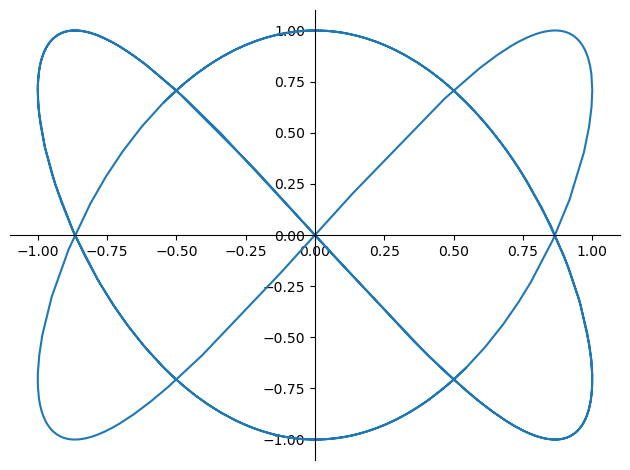

In [102]:
spl.plot_parametric(
    (my_x_eq, my_y_eq), 
    (t, -5, 5)
);

---
## Primes

In [103]:
# List of primes in the range 0 -> 100

list(sp.primerange(0,100))

In [104]:
# The 100th prime number

sp.prime(100)

In [105]:
# The next prime after 2023

sp.nextprime(2023)

In [106]:
# The prime factors of this year

sp.factorint(2023)

---
# `lambdify()`

## Turning a `sympy` function into a `numpy` function

$$\large
v=\sqrt{GM_{\odot}\over d} 
$$

In [107]:
v, d, G, M = sp.symbols('v d G M')

In [108]:
my_v_equation = sp.Eq(sp.sqrt( G * M / d ), v)

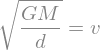

In [109]:
my_v_equation

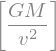

In [110]:
sp.solve(my_v_equation, d)

In [111]:
my_d_equation = sp.solve(my_v_equation, d)[0]

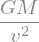

In [112]:
my_d_equation

## `lambdify([sympy variables], sympy function)`

### The result will be a `numpy` function

In [113]:
my_np_fx = sp.lambdify([v, G, M], my_d_equation)

In [114]:
my_np_fx

<function _lambdifygenerated(v, G, M)>

### This is the equivalent of writing the `numpy` function:

```
def my_np_fx(v, G, M):
    result = G * M / (v ** 2)
    return result
```

In [115]:
from astropy import units as u
from astropy import constants as const

In [116]:
my_np_fx(
    v = 23 * (u.km / u.s),
    G = const.G,
    M = const.M_sun
).to(u.AU)

<Quantity 1.6769903 AU>

----

## Side topic - Greek Letters

### Use can use greek letters in your equations by spelling out the letter

In [117]:
sigma, mu = sp.symbols('sigma mu')

In [118]:
my_greek_equation = 4 * sigma / mu

In [119]:
my_greek_equation

---
# `SymPy` can do *so* much more. It really is magic. 

## Complete documentation can be found [here](http://docs.sympy.org/latest/index.html)